In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

import numpy as np

#from mc_io_functions import load_mc_particles
#from mc_io_functions import load_mc_hits
#from mc_io_functions import load_mc_sensor_response

from invisible_cities.core.core_functions  import shift_to_bin_centers
from invisible_cities.core                 import fit_functions as fitf
#from invisible_cities.icaro.hst_functions import hist
#from invisible_cities.icaro.hst_functions import hist2d
#from invisible_cities.icaro.hst_functions import hist2d_profile
#from invisible_cities.icaro.hst_functions import labels


In [2]:
def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    y, x, p = plt.hist(*args, **kwargs)
    return y, shift_to_bin_centers(x), p


def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    z, x, y, p = plt.hist2d(*args, **kwargs)
    return z, shift_to_bin_centers(x), shift_to_bin_centers(y), p

def hist2d_profile(x, y, z, nbinx, nbiny, xrange, yrange, **kwargs):
    """
    Create a profile 2d of the data and plot it as an histogram.
    """
    x, y, z, ze = fitf.profileXY(x, y, z, nbinx, nbiny, xrange, yrange)
    plot_output = display_matrix(x, y, z, **kwargs)
    return ((x, y, z, ze), *plot_output)

def display_matrix(x, y, z, mask=None, **kwargs):
    """
    Display the matrix z using the coordinates x and y as the bin centers.
    """
    nx = x = np.size(x)
    ny = np.size(y)

    dx = (np.max(x) - np.min(x)) / nx
    dy = (np.max(y) - np.min(y)) / ny

    x_binning = np.linspace(np.min(x) - dx, np.max(x) + dx, nx + 1)
    y_binning = np.linspace(np.min(y) - dy, np.max(y) + dy, ny + 1)

    x_ = np.repeat(x, ny)
    y_ = np.tile  (y, nx)
    z_ = z.flatten()

    if mask is None:
        mask = np.ones_like(z_, dtype=bool)
    else:
        mask = mask.flatten()
    h  = hist2d(x_[mask], y_[mask], (x_binning,
                                     y_binning),
                weights = z_[mask],
                **kwargs)
    return h, plt.colorbar()

def create_new_figure(kwargs):
    if kwargs.setdefault("new_figure", True):
        plt.figure()
    del kwargs["new_figure"]

def labels(xlabel, ylabel, title=""):
    """
    Set x and y labels.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title ( title)
    
def EnergyRes(x):
    mu = np.mean(x)
    sigma = np.std(x)
    fwhm = 2.355*sigma/mu
    e_event = 41 # keV
    eres = fwhm*e_event
    return fwhm*100 # FWHM  # what units is this????

In [3]:
#nfiles = 2
#dirname = "/n/holystore01/LABS/guenette_lab/Users/tcontreras/nexus-production/test/"
#files = ["flex.kr83m."+str(i)+".nexus.h5" for i in range(1,2)]
#files_8 = ["/Users/taylorcontreras/Development/Research/Odyssey_sipmstudy/pitch_8mm/flex.kr83m."+str(i)+".nexus.h5" for i in range(0,nfiles)]
#config = pd.read_hdf(files[0], "MC/configuration")
tbin_sipms = 1.0 #mus
t1_s1 = 99 #  mus
t2_s1 = 102 #mus
t1_s2 = 102 #mus

test_file = ["/Users/taylorcontreras/Development/Research/trackingplane/s3mmp15mm/flex.kr83m.1.nexus.h5"]
config = pd.read_hdf(test_file[0], "MC/configuration")

In [4]:
config

,param_key,param_value
0,event_type,other
1,num_events,100
2,saved_events,100
3,interacting_events,0
4,PmtR11410_binning,0.025000 mus
...,...,...
69,/event/verbose,0
70,/tracking/verbose,0
71,/nexus/random_seed,2
72,/nexus/persistency/start_id,100


In [5]:
sns_response = pd.read_hdf(test_file[0], 'MC/sns_response')
sns_positions = pd.read_hdf(test_file[0], 'MC/sns_positions')
sns_positions = sns_positions.drop_duplicates(subset='sensor_id')
sns_positions

,sensor_id,sensor_name,x,y,z
0,8,PmtR11410,-125.0,216.506348,1468.699951
1,22,PmtR11410,-187.5,-324.759521,1468.699951
2,23,PmtR11410,187.5,-324.759521,1468.699951
3,37,PmtR11410,250.0,433.012695,1468.699951
4,5,PmtR11410,62.5,-108.253174,1468.699951
...,...,...,...,...,...
3363,1796,TP_SiPM,-112.5,-202.500000,-23.301001
3364,1942,TP_SiPM,277.5,-172.500000,-23.301001
3365,1470,TP_SiPM,37.5,-292.500000,-23.301001
3366,2929,TP_SiPM,-217.5,67.500000,-23.301001


In [6]:
pd.read_hdf(test_file[0], "MC/configuration")

,param_key,param_value
0,event_type,other
1,num_events,100
2,saved_events,100
3,interacting_events,0
4,PmtR11410_binning,0.025000 mus
...,...,...
69,/event/verbose,0
70,/tracking/verbose,0
71,/nexus/random_seed,2
72,/nexus/persistency/start_id,100


In [7]:
#config

In [8]:
all_sipms = pd.DataFrame()
all_pmts = pd.DataFrame()
events_allsensors = pd.DataFrame()
events_allsipms = pd.DataFrame()
events_allpmts = pd.DataFrame()
for file in test_file:
    sns_response = pd.read_hdf(file, 'MC/sns_response')
    sns_positions = pd.read_hdf(file, 'MC/sns_positions')
    #print("len of data", sns_response)
    # Sort to get the sipms
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

    # Sort to sum up all charges for each sipms
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    response_byid = sipm_response.groupby('sensor_id')
    summed_charges = response_byid.agg({"charge":"sum"}) 

    # Make data frame with sipms ids, position, and total charge
    #print("summed_charges:",summed_charges)
    #print("sipms_positions:", sipm_positions)
    new_sipm_positions = sipm_positions.set_index('sensor_id')
    new_df = pd.concat([new_sipm_positions.iloc[:,1:5], summed_charges], axis=1)
    all_sipms = all_sipms.append(new_df)
    
    # Sum of charges in an event
    response_byevent = sns_response_sorted.groupby('event_id')
    event_charge = response_byevent.agg({"charge":"sum"})
    events_allsensors = events_allsensors.append(event_charge)
    
    # Sum of charges in sipms per event
    this = sipm_response.groupby('event_id')
    charges = this.agg({"charge":"sum"})
    events_allsipms = events_allsipms.append(charges)
    
    # pmts
    pmt_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] < 60]
    response_byid_pmt = pmt_response.groupby('sensor_id')
    summed_charges_pmt = response_byid_pmt.agg({"charge":"sum"})
    pmt_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("Pmt")]
    new_pmt_positions = pmt_positions.set_index('sensor_id')
    new_df_pmt = pd.concat([new_pmt_positions.iloc[:,1:5], summed_charges_pmt], axis=1)
    all_pmts = all_pmts.append(new_df_pmt)
    
    this_pmts = pmt_response.groupby('event_id')
    charges_pmt = this_pmts.agg({"charge":"sum"})
    events_allpmts = events_allpmts.append(charges_pmt)

In [9]:
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
sipm_response_byevent = sipm_response.groupby('event_id')
charges = sipm_response_byevent.agg({"charge":"sum"})
#sipms = sipms.append(charges) #[events_allsipms.charge > 0]
sum_sipms_byevent = sipm_response_byevent.apply(lambda group: group.groupby('sensor_id').agg({"charge":"sum"})).groupby('event_id')
#for I, grp in sum_sipms_byevent:
#    print(grp[grp.charge > 1])
print(sum_sipms_byevent.apply(lambda group: group[group.charge>1]))
print(type(charges))

                             charge
event_id event_id sensor_id        
100      100      1004            3
                  1010            2
                  1011            2
                  1020            2
                  1021            2
...                             ...
199      199      4296            2
                  4297            2
                  4298            4
                  4305            2
                  4306            2

[94267 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [10]:
from dataclasses import dataclass
from typing      import Tuple
from typing      import TypeVar
from typing      import Callable
from collections import namedtuple
from scipy.optimize          import OptimizeWarning
import warnings

from invisible_cities.evm  .ic_containers import FitFunction
from   invisible_cities.core.core_functions    import in_range
from   invisible_cities.core .stat_functions import poisson_sigma

Measurement = namedtuple('Measurement', 'value uncertainty')
Number = TypeVar('Number', None, int, float)
NN = np.nan

@dataclass
class HistoPar:
    var    : np.array
    nbins  : int
    range  : Tuple[float]
        
@dataclass
class GaussPar:
    mu    : Measurement
    std   : Measurement
    amp   : Measurement
        
@dataclass
class ProfilePar:
    x  : np.array
    y  : np.array
    xu : np.array
    yu : np.array
        
@dataclass
class FitPar(ProfilePar):
    f     : FitFunction
        
@dataclass
class FitResult:
    par   : np.array
    err   : np.array
    chi2  : float
    valid : bool
        
@dataclass
class FitCollection:
    fp   : FitPar
    hp   : HistoPar
    fr   : FitResult
        
def gaussian_parameters(x : np.array, range : Tuple[Number], bin_size : float = 1)->GaussPar:
    """
    Return the parameters defining a Gaussian
    g = N * exp(x - mu)**2 / (2 * std**2)
    where N is the normalization: N = 1 / (sqrt(2 * np.pi) * std)
    The parameters returned are the mean (mu), standard deviation (std)
    and the amplitude (inverse of N).
    """
    mu, std = mean_and_std(x, range)
    ff     = np.sqrt(2 * np.pi) * std

    amp     = len(x) * bin_size / ff

    sel  = in_range(x, *range)
    N = len(x[sel])              # number of samples in range
    mu_u  = std / np.sqrt(N)
    std_u = std / np.sqrt(2 * (N -1))
    amp_u = np.sqrt(2 * np.pi) * std_u

    return GaussPar(mu  = Measurement(mu, mu_u),
                    std = Measurement(std, std_u),
                    amp = Measurement(amp, amp_u))

def gaussian_fit(x       : np.array,
                 y       : np.array,
                 seed    : GaussPar,
                 n_sigma : int)  ->Tuple[FitPar, FitResult]:
    """Gaussian fit to x,y variables, with fit range defined by n_sigma"""

    mu  = seed.mu.value
    std = seed.std.value
    amp = seed.amp.value
    fit_range = mu - n_sigma * std, mu + n_sigma * std

    x, y      = x[in_range(x, *fit_range)], y[in_range(x, *fit_range)]
    yu        = poisson_sigma(y)
    fseed     = (amp, mu, std)

    par, err = par_and_err_from_seed(seed)
    fr = FitResult(par = par,
                   err = err,
                   chi2 = NN,
                   valid = False)
    fp = None

    with warnings.catch_warnings():
        warnings.filterwarnings('error')  # in order to handle fit failures here
        try:
            fp, fr = gfit(x, y, yu, fseed)
        except RuntimeWarning:   # this is the most usual failure, and usually solved trying fitx
                                 # with a different seed
            print(f' fit failed for seed  = {seed}, due to RunTimeWarning, retry fit ')
            fseed = (10*fseed[0], fseed[1], fseed[2] )
            try:
                fp, fr = gfit(x, y, yu, fseed)
            except RuntimeWarning: #  Give up on second failure
                print(f' fit failed for seed  = {seed}, due to RunTimeWarning, give up ')
        except OptimizeWarning:
            print(f' OptimizeWarning was raised for seed  = {seed} due to OptimizeWarning')
        except RuntimeError:
            print(f' fit failed for seed  = {seed}  due to RunTimeError')
        except TypeError:
            print(f' fit failed for seed  = {seed}  due to TypeError')

    return fp, fr

def fit_energy(e : np.array,
               nbins   : int,
               range   : Tuple[float],
               n_sigma : float = 3.0)->FitCollection:
    """
    Takes an "energy vector" (e.g, 1d array), with number of bins enbins and range erange, then:
        1. Computes the histogram of e with enbins in erange. This returns an array of bin
        edges (b), and bin contents (y). The array (b) is shifted to bin centers (x)
        2. The arrays x and y are fitted to a gaussian, in a range given by an interval
        arround the estimation of the maximum of the gaussian. The interval size is estimated
        by multiplying n_sigma by the estimation of the gaussian std.
    The result of the fit is a fit collection, that includes a FitPar and a HistoPar objects
    needed for printing and plotting the fit result.
       """

    y, b = np.histogram(e, bins= nbins, range=range)
    x = shift_to_bin_centers(b)
    bin_size = (range[1] - range[0]) / nbins
    seed = gaussian_parameters(e, range, bin_size)

    fp, fr = gaussian_fit(x, y, seed, n_sigma)

    hp = HistoPar(var      = e,
                  nbins    = nbins,
                  range    = range)

    return FitCollection(fp = fp, hp = hp, fr = fr)

def mean_and_std(x : np.array, range_ : Tuple[Number, Number])->Tuple[Number, Number]:
    """Computes mean and std for an array within a range: takes into account nans"""

    mu  = NN
    std = NN

    if all(np.isnan(x)):  # all elements are nan
        mu  = NN
        std = NN
    else:
        x_nonnan = x[np.isfinite(x)]
        y = x_nonnan[in_range(x_nonnan, *range_)]
        if len(y) == 0:
            warnings.warn(f'warning, empty slice of x = {x} in range = {range_}')
            mu  = NN
            std = NN
        else:
            mu  = np.mean(y)
            std = np.std(y)

    return mu, std

def par_and_err_from_seed(seed : GaussPar) ->Tuple[np.array, np.array]:
    par = np.zeros(3)
    err = np.zeros(3)
    par[0] = seed.amp.value
    par[1] = seed.mu.value
    par[2] = seed.std.value
    err[0] = seed.amp.uncertainty
    err[1] = seed.mu.uncertainty
    err[2] = seed.std.uncertainty
    return par, err

def gfit(x     : np.array,
         y     : np.array,
         yu    : np.array,
         fseed : Tuple[float, float, float]) ->Tuple[FitPar, FitResult]:

    f     = fitf.fit(fitf.gauss, x, y, fseed, sigma=yu)
    c2    = chi2(f, x, y, yu)
    par  = np.array(f.values)
    err  = np.array(f.errors)
    xu   = np.diff(x) * 0.5

    fr = FitResult(par = par,
                   err = err,
                   chi2 = c2,
                   valid = True)
    fp = FitPar(x  = x, y  = y, xu = xu, yu = yu, f  = f.fn)

    return fp, fr

def chi2f(f   : Callable,
          nfp : int,        # number of function parameters
          x   : np.array,
          y   : np.array,
          yu  : np.array)->float:
    """
    Computes the chi2 of a function f applied over array x and compared
    with array y with error yu
    """

    assert len(x) == len(y) == len(yu)
    fitx  = f(x)
    chi2_ = np.sum(((y - fitx) / yu)**2)

    if len(x) > nfp:
        return chi2_/(len(x)-nfp)
    else:
        warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)
        return chi2_



def chi2(f : FitFunction,
         x : np.array,
         y : np.array,
         sy: np.array)->float:
    """
    Computes the chi2 of a function f applied over array x and compared
    with array y with error yu. The object f is of type FitFunction.
    """
    return chi2f(f.fn, len(f.values), x, y, sy)

def plot_fit_energy(fc : FitCollection):

    if fc.fr.valid:
        par  = fc.fr.par
        x    = fc.hp.var
        r    = 2.35 * 100 *  par[2] / par[1]
        entries  =  f'Entries = {len(x)}'
        mean     =  r'$\mu$ = {:7.2f}'.format(par[1])
        sigma    =  r'$\sigma$ = {:7.2f}'.format(par[2])
        rx       =  r'$\sigma/mu$ (FWHM)  = {:7.2f}'.format(r)
        stat     =  f'{entries}\n{mean}\n{sigma}\n{rx}'

        _, _, _   = plt.hist(fc.hp.var,
                             bins = fc.hp.nbins,
                             range=fc.hp.range,
                             histtype='step',
                             edgecolor='black',
                             linewidth=1.5,
                             label=stat)

        plt.plot(fc.fp.x, fc.fp.f(fc.fp.x), "r-", lw=4)
    else:
        warnings.warn(f' fit did not succeed, cannot plot ', UserWarning)


def print_fit_energy(fc : FitCollection):

    par  = fc.fr.par
    err  = fc.fr.err
    try:
        r  = 2.35 * 100 *  par[2] / par[1]
        fe = np.sqrt(41 / 2458) * r
        print(f'  Fit was valid = {fc.fr.valid}')
        print(f' Emu       = {par[1]} +-{err[1]} ')
        print(f' E sigma   = {par[2]} +-{err[2]} ')
        print(f' chi2    = {fc.fr.chi2} ')

        print(f' sigma E/E (FWHM)     (%) ={r}')
        print(f' sigma E/E (FWHM) Qbb (%) ={fe} ')
    except ZeroDivisionError:
        warnings.warn(f' mu  = {par[1]} ', UserWarning)


In [11]:
fe = fit_energy(events_allsipms.charge, 100, (np.min(events_allsipms.charge), np.max(events_allsipms.charge)))

  Fit was valid = True
 Emu       = 8216.57815438712 +-19.411588280210534 
 E sigma   = 144.31716195675804 +-16.7390068875065 
 chi2    = 0.32075072117340253 
 sigma E/E (FWHM)     (%) =4.127573841883312
 sigma E/E (FWHM) Qbb (%) =0.5330842366338624 


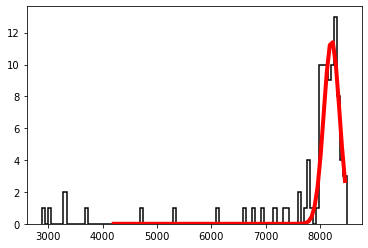

In [12]:
plot_fit_energy(fe)
plt.savefig('test')
print_fit_energy(fe)

In [13]:
fe.fr

FitResult(par=array([4172.30870483, 8216.57815439,  144.31716196]), err=array([503.62215002,  19.41158828,  16.73900689]), chi2=0.32075072117340253, valid=True)

In [14]:
fe.fr[0]

TypeError: 'FitResult' object is not subscriptable

In [15]:
all_sipms8 = pd.DataFrame()
all_pmts8 = pd.DataFrame()
events_allsensors8 = pd.DataFrame()
events_allsipms8 = pd.DataFrame()
events_allpmts8 = pd.DataFrame()
for file in [test_file]:
    sns_response = pd.read_hdf(file, 'MC/sns_response')
    sns_positions = pd.read_hdf(file, 'MC/sns_positions')

    # Sort to get the sipms
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

    # Sort to sum up all charges for each sipms
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    response_byid = sipm_response.groupby('sensor_id')
    summed_charges = response_byid.agg({"charge":"sum"}) 

    # Make data frame with sipms ids, position, and total charge
    new_sipm_positions = sipm_positions.set_index('sensor_id')
    new_df = pd.concat([new_sipm_positions.iloc[:,1:5], summed_charges], axis=1)
    all_sipms8 = all_sipms8.append(new_df)
    
    # Sum of charges in an event
    response_byevent = sns_response_sorted.groupby('event_id')
    event_charge = response_byevent.agg({"charge":"sum"})
    events_allsensors8 = events_allsensors8.append(event_charge)
    
    # Sum of charges in sipms per event
    this = sipm_response.groupby('event_id')
    charges = this.agg({"charge":"sum"})
    events_allsipms8 = events_allsipms8.append(charges)
    
    # pmts
    pmt_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] < 60]
    response_byid_pmt = pmt_response.groupby('sensor_id')
    summed_charges_pmt = response_byid_pmt.agg({"charge":"sum"})
    pmt_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("Pmt")]
    new_pmt_positions = pmt_positions.set_index('sensor_id')
    new_df_pmt = pd.concat([new_pmt_positions.iloc[:,1:5], summed_charges_pmt], axis=1)
    all_pmts8 = all_pmts8.append(new_df_pmt)
    
    this_pmts = pmt_response.groupby('event_id')
    charges_pmt = this_pmts.agg({"charge":"sum"})
    events_allpmts8 = events_allpmts8.append(charges_pmt)

NotImplementedError: Support for generic buffers has not been implemented.

In [16]:
def DrawSiPM(t, s):
    # drawing first side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing second side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing third side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing fourth side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

In [17]:
import turtle
#x = [x for x in sipm_positions.x]
#y = [y for y in sipm_positions.y]
s = 5 # mm
t = turtle.Turtle() 
window = turtle.Screen()
window.bgcolor("white")
window.exitonclick()

In [16]:
DrawSiPM(t, s)
t.circle(10)

NameError: name 'DrawSiPM' is not defined

In [ ]:
import pygame

pygame.init()

white = (255,255,255)
black = (0,0,0)

red = (255,0,0)
green = (0,255,0)
blue = (0,0,255)

gameDisplay = pygame.display.set_mode((800,600))
gameDisplay.fill(black)

In [ ]:
plt.hist(events_allsensors.charge, label="10mm pitch")
#plt.hist(events_allsensors8.charge, label='8mm pitch')
plt.xlabel("Charge per event [pes]")
plt.title("NEXT-100, 6mm sipms")
plt.legend()
plt.show()

plt.hist(events_allsensors.charge, label="All sensors", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.hist(events_allsipms.charge, label="SiPMs", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.hist(events_allpmts.charge, label="PMTs", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.xlabel("Charge per event [pes]")
plt.title("NEXT-100, 6mm sipms, 10mm pitch")
plt.legend()
plt.show()

#plt.hist(events_allsensors8.charge, label="All sensors", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.hist(events_allsipms8.charge, label="SiPMs", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.hist(events_allpmts8.charge, label="PMTs", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.xlabel("Charge per event [pes]")
#plt.title("NEXT-100, 6mm sipms, 8mm pitch")
#plt.legend()
#plt.show()

# Plot sipm positions
#XYrange       =  -500, 500
#hist2d(sipm_positions.x, sipm_positions.y, (25,25), [XYrange, XYrange])
#plt.plot(sipm_positions.x, sipm_positions.y, ".")
#plt.xlim(-50,50)
#plt.ylim(-50,50)
#plt.savefig("sipm_positions.png")
#plt.close()


In [ ]:
print(EnergyRes(events_allsensors.charge),EnergyRes(events_allpmts.charge), EnergyRes(events_allsipms.charge))

In [ ]:
y = events_allsipms8.charge.nunique()

In [ ]:
plt.plot(events_allsipms8.apply(lambda x: (x//100)*100).sort_values('charge').charge.value_counts(), 'o')

In [ ]:
x = events_allsipms8.apply(lambda x: (x//100)*100).sort_values('charge').charge
y = x.value_counts()

In [ ]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [ ]:
#popt, pcov = curve_fit(gaus, x.unique(), y)
mean,std=norm.fit(events_allsipms8)

In [ ]:
mean, std

# Testing noise thresholding

In [25]:
dark_rate = 10.
dark_count  = sipm_timing*dark_rate
dark_count = dark_count.rename(columns={0:'dark_count'})
def Thresh_by_Event(group, args=dark_count):
    event = group.index.tolist()[0] #.event_id.max()
    thresh = dark_count.loc[event].dark_count
    return group[group.charge > thresh]

In [26]:
this = events_allsipms.groupby('event_id')
thresh_sipm_response = this.apply(Thresh_by_Event, args=(dark_count))#.set_index('event_id') #.groupby('event_id')
#for grp, _ in this:
#    event = _.index.tolist()[0] #.event_id.max()
#    thresh = dark_count.loc[event].dark_count
#    print(_.charge > thresh)

print(thresh_sipm_response.charge)

event_id  event_id
100       100         8138
101       101         8255
102       102         8254
103       103         4683
104       104         8377
105       105         7794
106       106         8142
107       107         8235
108       108         8221
109       109         8082
110       110         8205
111       111         8366
112       112         8133
113       113         8053
114       114         8220
115       115         8066
116       116         8175
117       117         3017
118       118         7994
119       119         6956
120       120         8185
121       121         8489
122       122         8431
123       123         8053
124       124         8187
125       125         8320
126       126         8421
127       127         8271
128       128         8175
129       129         8108
                      ... 
170       170         3312
171       171         7611
172       172         8144
173       173         8398
174       174         8037
175      

In [27]:
all_sipms = pd.DataFrame()
all_pmts = pd.DataFrame()
events_allsensors = pd.DataFrame()
events_allsipms = pd.DataFrame()
events_allpmts = pd.DataFrame()
sipm_timing = pd.DataFrame()
pmt_timing = pd.DataFrame()
for file in test_file:
    sns_response = pd.read_hdf(file, 'MC/sns_response')
    sns_positions = pd.read_hdf(file, 'MC/sns_positions')
    
    # Sort to get the sipms
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

    # Sort to sum up all charges for each sipms
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    sipm_response = sipm_response.loc[sipm_response["time_bin"] >0]
    response_byid = sipm_response.groupby('sensor_id')
    summed_charges = response_byid.agg({"charge":"sum"}) 

    # Make data frame with sipms ids, position, and total charge
    new_sipm_positions = sipm_positions.set_index('sensor_id')
    new_df = pd.concat([new_sipm_positions.iloc[:,1:5], summed_charges], axis=1)
    all_sipms = all_sipms.append(new_df)
    
    # Sum of charges in an event
    response_byevent = sns_response_sorted.groupby('event_id')
    event_charge = response_byevent.agg({"charge":"sum"})
    events_allsensors = events_allsensors.append(event_charge)
    
    # Sum of charges in sipms per event
    this = sipm_response.groupby('event_id')
    charges = this.agg({"charge":"sum"})
    events_allsipms = events_allsipms.append(charges)
    
    # pmts
    pmt_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] < 60]
    pmt_response = pmt_response.loc[pmt_response["time_bin"] >0]
    response_byid_pmt = pmt_response.groupby('sensor_id')
    summed_charges_pmt = response_byid_pmt.agg({"charge":"sum"})
    pmt_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("Pmt")]
    new_pmt_positions = pmt_positions.set_index('sensor_id')
    new_df_pmt = pd.concat([new_pmt_positions.iloc[:,1:5], summed_charges_pmt], axis=1)
    all_pmts = all_pmts.append(new_df_pmt)
    
    # Sum of charges in pmts per event
    this_pmts = pmt_response.groupby('event_id')
    charges_pmt = this_pmts.agg({"charge":"sum"})
    events_allpmts = events_allpmts.append(charges_pmt)
    
    # Time length of events
    pmt_timing = pmt_timing.append(pmt_response.groupby(['event_id'])\
                    .apply(lambda group: group['time_bin'].max() - group['time_bin'].min()).to_frame())
    sipm_timing = sipm_timing.append(sipm_response.groupby(['event_id'])\
                    .apply(lambda group: group['time_bin'].max() - group['time_bin'].min()).to_frame())

    # Threshold event based on dark noise
    this = events_allsipms.groupby('event_id')
    dark_rate = 10.
    dark_count  = sipm_timing*dark_rate
    dark_count = dark_count.rename(columns={0:'dark_count'})
    print(dark_count.mean())
    thresh_sipm_response = this.apply(Thresh_by_Event, args=(dark_count))#.set_index('event_id') #.groupby('event_id')


dark_count    134.3
dtype: float64


In [29]:
sipm_timin

,dark_count
event_id,
100,180.0
101,100.0
102,120.0
103,100.0
104,110.0
105,90.0
106,120.0
107,120.0
108,170.0


In [28]:
fe = fit_energy(thresh_sipm_response.charge, 100, (np.min(thresh_sipm_response.charge), np.max(thresh_sipm_response.charge)))

plot_fit_energy(fe)
plt.savefig('test')
print_fit_energy(fe)
fe[0]

NameError: name 'thresh_sipm_response' is not defined

In [32]:
import matplotlib
print(matplotlib.__version__)

3.0.1


AttributeError: 'AxesSubplot' object has no attribute 'secondary_yaxis'

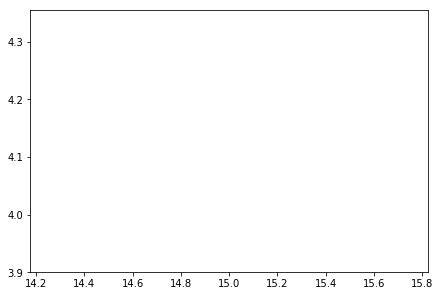

In [27]:
fig, ax = plt.subplots()
r  = 2.35 * 100 *  fe.fr.par[2] / fe.fr.par[1]
ax.plot(15., r)


def to_qbb(x):
    return x / np.sqrt(2.4)

def back_tokr(x):
    return x * np.sqrt(2.4)


secax = ax.secondary_yaxis('right', functions=(to_qbb, back_tokr))
plt.show()

# Testing exp+gaussian fit

In [15]:
import invisible_cities.core.fit_functions as fit
x = sipm_response.charge
y = np.exp(-(x-1.)**2)
f = fit.fit(fit.gauss, x, y, (1., 2., 3))
print(f.values)

[1.77245385 1.         0.70710678]


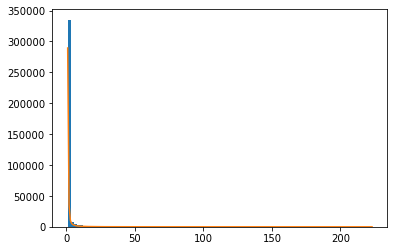

In [55]:
count = sipm_response.pivot_table(index=['charge'], aggfunc='size')
hist(sipm_response.charge, bins=100)
plt.plot(sipm_response.sort_values(by='charge').charge.drop_duplicates(), count)

In [18]:
import scipy
fit_params = scipy.stats.exponnorm.fit(events_allsipms.charge.charge, loc=8000, scale=1)
fit_line = scipy.stats.exponnorm.rvs(fit_params[0], fit_params[1], fit_params[2], size=100)

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1535: RuntimeWarning: divide by zero encountered in log
  return exparg + np.log(0.5 * invK * sc.erfc(-(x - invK) / np.sqrt(2)))


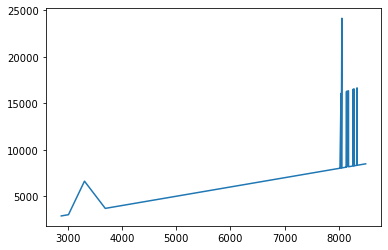

In [212]:
data = events_allsipms.groupby('charge').agg({'charge':'sum'}).charge #.to_numpy()
x = data.index.to_numpy()
y = data.to_numpy()
plt.plot(x,y)
#plt.xlim(0,25)
#plt.plot(sipm_response.charge, sipm_response.charge.count)

In [213]:
popt, _ = curve_fit(exp_plus_gauss, x, y)

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


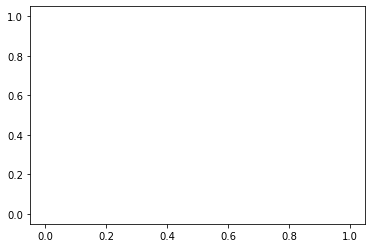

In [214]:
mean, sigma, a, b = popt
new_y = [gauss(this_x, mean, sigma) for this_x in x]
plt.plot(x, new_y)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([9655.6543306, 9655.7543306, 9655.8543306, 9655.9543306,
        9656.0543306, 9656.1543306, 9656.2543306, 9656.3543306,
        9656.4543306, 9656.5543306, 9656.6543306]),
 <a list of 10 Patch objects>)

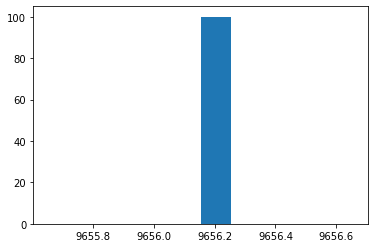

In [24]:
plt.hist(fit_line)
#plt.hist(sipm_response.charge)

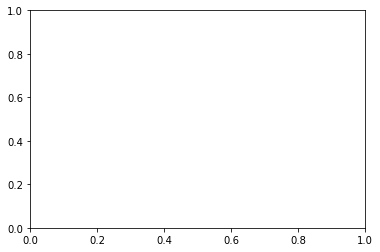

In [64]:
from scipy.stats import exponnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [175]:
K = .09
loc = 10
scale = 7
mean, var, skew, kurt = exponnorm.stats(K=K, loc=loc, scale=scale, moments='mvsk')

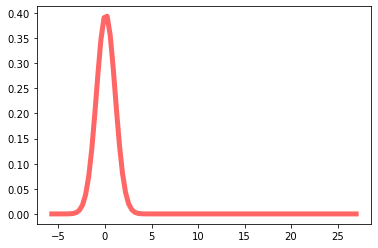

In [186]:
x = np.linspace(exponnorm.ppf(0.01, K=K, loc=loc, scale=scale),
                exponnorm.ppf(0.99, K=K, loc=loc, scale=scale), 100)
plt.plot(x, exponnorm.pdf(x, K),
       'r-', lw=5, alpha=0.6, label='exponnorm pdf')


In [199]:
def exp_plus_gauss(x, mean, sigma, a, b):
    return (1./(sigma*np.sqrt(np.pi*2))) * np.exp(-.5*((x-mean)/sigma)**2) + a*np.exp(-x/b)

def gauss(x, mean, sigma):
    return np.exp(-.5*((x-mean)/sigma)**2) + a*np.exp(-x/b)

In [200]:
# fit curve
popt, _ = curve_fit(exp_plus_gauss, x, exponnorm.pdf(x, K))

In [201]:
mean, sigma, a, b = popt

In [202]:
new_y = [gauss(this_x, mean, sigma) for this_x in x]
new_y

[-1.0715370923099622e-05,
 -9.479599155213657e-06,
 -6.965597946733394e-06,
 2.078089042627927e-06,
 3.961735338542862e-05,
 0.00018695646789691444,
 0.00070930156630627,
 0.0023653116771755072,
 0.0070453602897907145,
 0.018810296441273265,
 0.04505424040633581,
 0.09683279022261267,
 0.1867605050240216,
 0.32324569643300893,
 0.5020752490889346,
 0.6998330295396407,
 0.8754071938748175,
 0.9826888943842786,
 0.9899478957576159,
 0.8949504922631113,
 0.726065946442527,
 0.5286198487444149,
 0.34538311272721006,
 0.20251104956808574,
 0.10655792826148355,
 0.05031654247579752,
 0.02132160568515017,
 0.008107776558588884,
 0.0027664342655043606,
 0.0008467414916723256,
 0.00023223065115424117,
 5.681250675330557e-05,
 1.2133356972168637e-05,
 1.9937143785716294e-06,
 -3.556452297486941e-08,
 -3.714731580651729e-07,
 -3.945263563387787e-07,
 -3.6826606859806114e-07,
 -3.3724823579006033e-07,
 -3.0799495261002054e-07,
 -2.811784266756927e-07,
 -2.56686039313273e-07,
 -2.343260688226377e-0

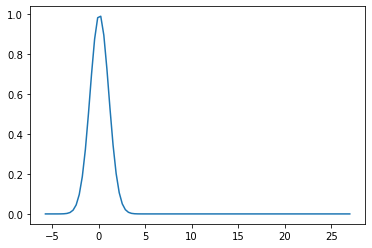

In [203]:
plt.plot(x, new_y)

# Testing R cuts

In [28]:
def Center_of_Event(sipm_response_in_event, sipm_positions):
    top_sipms = sipm_response_in_event[sipm_response_in_event.charge > max(sipm_response_in_event.charge)*.1]
    sensor_positions = sipm_positions.loc[sipm_positions.sensor_id.isin(top_sipms.sensor_id.tolist())]
    sensor_positions = sensor_positions.reindex(sensor_positions.index.repeat(top_sipms.groupby('sensor_id').sensor_id.count().values))
    top_sipms = top_sipms.merge(sensor_positions)

    x = np.sum(top_sipms.charge*top_sipms.x)/np.sum(top_sipms.charge)
    y = np.sum(top_sipms.charge*top_sipms.y)/np.sum(top_sipms.charge)
    z = np.sum(top_sipms.charge*top_sipms.z)/np.sum(top_sipms.charge)
    charge = np.sum(top_sipms.charge)
    event_id = top_sipms.event_id[0]
    
    r = np.sqrt(x**2 + y**2 + z**2)

    return pd.Series({'event_id':event_id, 'charge':charge,'x':x, 'y':y, 'z':z, 'r':r})



In [38]:
event_centers = sipm_response.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_positions))
sipm_response = sipm_response[sipm_response.event_id.isin(event_centers[event_centers.r < 400].event_id)]

